In [1]:

# Initialize a list to store verbs
verbs_list = []

# Specify the file path of the text file
file_path = "most_common_verbs.txt"

# Read the text file and save each line (verb) into the list
with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        verb = line.strip()  # Remove leading/trailing whitespace
        verbs_list.append(verb)

# Print the list of verbs
print("List of verbs:")
most_common_verbs = verbs_list[:14]
print(most_common_verbs)

List of verbs:
['voir', 'trouver', 'donner', 'venir', 'pouvoir', 'prendre', 'devoir', 'vouloir', 'mettre', 'falloir', 'savoir', 'aller', 'arriver', 'passer']


In [2]:
import json
# Load the dictionary containing filenames and titles from the JSON file
with open('filter_data2.json', 'r') as json_file:
    data = json.load(json_file)
# Extract titles from the dictionary

#load model top2vec
# decider d'eliminer certains categories de documents qui ne donnent que des contenus administratif et d'organisation
# et enlever aussi des mots bruyants
import nltk
nltk.download('punkt')
import spacy
from nltk.corpus import stopwords

corpus_man_filtered=[]
for article in data:
    all_sub_text_not_found = True
    text = article["FolderName"]
    doc = article["TextData"]
    for elim in []: #["actes-de-la-soci", "liste-des-membres", "liste-générale-des-membres", "procès-verbaux"] : #, "rapport-financier", "rapport-du-trésorier" ]:
        if elim in text:
            all_sub_text_not_found = False
    if all_sub_text_not_found:
        corpus_man_filtered.append(doc)
            
# Load the French language model
nlp = spacy.load("fr_core_news_sm")

# Get the French stopwords
french_stopwords_spacy = nlp.Defaults.stop_words
# Download the French stopwords dataset
nltk.download("stopwords")
# Load the nltk stopwords
fr_stopwords = set(stopwords.words("french"))
en_stopwords = set(stopwords.words("english"))

file_path = '/home/sau/Downloads/noise_word'  # Replace with the path to your file
noise_word_list = []

with open(file_path, 'r') as file:
    for line in file:
        # Remove leading and trailing whitespace and add the word to the list
        noise_word_list.append(line.strip())

for n in noise_word_list:
    fr_stopwords.add(n)
for n in en_stopwords:
    fr_stopwords.add(n)
for v in most_common_verbs:
    fr_stopwords.add(v)
    
i=0
preprocessed_corpus=[]
for text in corpus_man_filtered:
    words = text.split()
    filtered_words = [word.lower() for word in words 
                      if word.lower() not in fr_stopwords 
                      and word.lower() not in french_stopwords_spacy]
    preprocessed_text = " ".join(filtered_words)
    preprocessed_corpus.append(preprocessed_text)
    

[nltk_data] Downloading package punkt to /home/sau/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Import necessary libraries
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Sample corpus
corpus = preprocessed_corpus

# Tokenize the sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Create and train a Word2Vec model
model_w2v = Word2Vec(sentences=tokenized_corpus, vector_size=1000, window=5, min_count=10, sg=0)

# # Save the model for later use
# model_w2v.save("word2vec_1000_5_10")

# Load the model if needed
# model = Word2Vec.load("word2vec_model")

# Get the word vector for a specific word
# word_vector = model_w2v.wv['science']

# Find similar words to a given word
# similar_words = model_w2v.wv.most_similar('science', topn=50)

# Print the word vector and similar words
# print("Vector for 'science':\n", word_vector)
# print("\nSimilar words to 'science':\n", similar_words)

[nltk_data] Downloading package punkt to /home/sau/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NameError: name 'similar_words' is not defined

In [8]:

# modelw2v = Word2Vec.load("word2vec_1000_")
keyword = 'agriculture'
similar_words = model_w2v.wv.most_similar(keyword, topn=50)
ww=[]
sc = []
for w in similar_words:
    ww.append(w[0])
#     sc.append(w[1])
print(ww)
# print(sc)

['industriel', 'agricole', 'industrie', 'international', 'création', 'financier', 'mine', 'laboratoire', 'scolaire', 'uni', 'colonial', 'forestier', 'ressource', 'commercial', 'géologique', 'économique', 'communication', 'exposition', 'syndicat', 'forestièrer', 'fonds', 'programme', 'agronomique', 'trayau', 'culturel', 'vétérinaire', 'fonctionnement', 'hydrographique', 'envisager', 'botanique', 'périodique', 'algérie', 'enseignemer', 'comnagnie', 'organisation', 'ingénieur', 'fédéralisme', 'activité', 'comlté', 'statut', 'mutuel', 'unesco', 'agri', 'technicien', 'cadastre', 'association', 'indochin', 'orientaliste', 'amélioration', 'élaborer']


In [109]:
model_w2v.wv.most_similar(keyword, topn=50)

[('archéologie', 0.9881561994552612),
 ('percheron', 0.9838609099388123),
 ('philologie', 0.9827739000320435),
 ('enselgnement', 0.980262279510498),
 ('littérature', 0.9796388745307922),
 ('manuel', 0.9791686534881592),
 ('médical', 0.9784541130065918),
 ('flistoir', 0.9781040549278259),
 ('acupuncture', 0.9777674078941345),
 ('thèse', 0.9777036309242249),
 ('ponaise', 0.9773114919662476),
 ('cartographie', 0.9768349528312683),
 ('heard', 0.976289689540863),
 ('latin', 0.9762115478515625),
 ('catalogue', 0.9759628176689148),
 ('art', 0.9755424857139587),
 ('tibétain', 0.9755153656005859),
 ('collection', 0.9754775166511536),
 ('puplier', 0.9747615456581116),
 ('purlication', 0.9743770360946655),
 ('rartet', 0.9743490815162659),
 ('auttefuge', 0.9742953181266785),
 ('namien', 0.9742251038551331),
 ('bibliographi', 0.9740342497825623),
 ('phifoloegie', 0.9732239246368408),
 ('dictionnaire', 0.9731049537658691),
 ('masson', 0.9730849862098694),
 ('littéraire', 0.9730614423751831),
 ('litt

In [15]:
from top2vec import Top2Vec
model = Top2Vec.load('model_ngram_10_fast-learn')

from collections import Counter, defaultdict

def count_freq(idd,keyword):
    corpus_search = [preprocessed_corpus[idd]]
    
    # Tokenize the corpus
    search_tokens = [nltk.word_tokenize(sentence.lower()) for sentence in corpus_search]

    # Create a frequency dictionary for keywords
    keyword_freq = defaultdict(int)
    ww = [keyword]

    # Loop through the corpus and count keyword frequencies
    for sentence_tokens in search_tokens:
        for word in sentence_tokens:
            if word in ww:
                keyword_freq[word] += 1
    sum_freq = 0
    # Display the frequency of each keyword
    for keyword, frequency in sorted(keyword_freq.items(),key=lambda item: item[1]):
        string = (f"{keyword}; {frequency} ; {len(corpus_search[0])} ;")
#         sum_freq += frequency
#     print(sum_freq)
    if not keyword_freq:
        frequency = 0
        string = (f"'{frequency}': 0 ; {len(corpus_search[0])} ;")
    return frequency, string

num_doc = 10
# keyword = 'militaire'
listkw = ['ethnologie', 'philologie', 'sociologie', 'archéologie', 'géographie', 'ethnographie', 'anthropologie', 
          'médecine', 'orientaliste', 'philosophie', 'anatomie', 'paléontologie', 'économiste', 'linguistique', 
          'précolombien' , 'astrobiologie', 'philologue', 'préhistoire', 'astronomie', 'sinologie', 'mathématique' ,
          'nationaliste']
# listkw = ['lao', 'cambodge', 'angkor', 'mekong']
keyword_freq = defaultdict(int)
keyword_year = {}
keyword_doc = defaultdict(int)

for keyword in listkw:
    [search_doc,search_score, search_doc_ID] = model.search_documents_by_keywords([keyword],100)
    year = []
    for id,score in zip(search_doc_ID, search_score):
        frequency, string = count_freq(id,keyword)
        if frequency>0 and score > 0.2:
            keyword_freq[keyword]+=frequency
            keyword_doc[keyword]+=1
            year.append(data[id]['LatestYear'])
            print(string, ';', id, ';',  score, ';',  data[id]["FolderName"][:-7], ';', data[id]["LatestYear"])
    keyword_year[keyword] = year
    print('-----------------------------------------------')
    

ethnologie; 10 ; 48469 ; ; 106 ; 0.43485894799232483 ; introduction-à-l-ethnologie-du-đình_1962_tome_xxxvii ; 1962
ethnologie; 2 ; 1221 ; ; 626 ; 0.41373246908187866 ; notes-bibliographiques_1951_tome_xxvi ; 1951
ethnologie; 1 ; 1263 ; ; 341 ; 0.3828314542770386 ; congrès-international-d-histoire-des-relations-culturelles-entre-l-occident-et-l-orient-s-de-labrusse_1957_tome_xxxii ; 1957
ethnologie; 3 ; 23653 ; ; 119 ; 0.32905709743499756 ; l-orientalisme-et-les-sciences-humaines_1951_tome_xxvi ; 1951
ethnologie; 1 ; 6229 ; ; 694 ; 0.3266099691390991 ; variétés_1959_tome_xxxiv_4 ; 1959
ethnologie; 1 ; 2731 ; ; 13 ; 0.30961406230926514 ; adresses-de-félicitations-des-sociétés-savantes-d-indochine-et-d-outre-mer_1933_tome_viii ; 1933
ethnologie; 5 ; 8603 ; ; 521 ; 0.3077525496482849 ; variétés-internationales_1960_tome_xxxv ; 1960
ethnologie; 2 ; 5680 ; ; 432 ; 0.29698818922042847 ; louis-bezacier-1906-1966_1966_tome_xli ; 1966
ethnologie; 2 ; 10806 ; ; 709 ; 0.2923804819583893 ; bibliogr

archéologie; 4 ; 18369 ; ; 342 ; 0.2741687297821045 ; connaissance-d-angkor-par-l-épigraphie_1952_tome_xxvii ; 1952
archéologie; 4 ; 9573 ; ; 637 ; 0.2642025351524353 ; etudes-chinoises-classiques_1951_tome_xxvi ; 1951
archéologie; 1 ; 8904 ; ; 537 ; 0.26395174860954285 ; les-premières-images-brahmaniques-d-indochine_1951_tome_xxvi ; 1951
archéologie; 4 ; 39969 ; ; 410 ; 0.2632276713848114 ; le-nord-est-ou-levant-d-été-particulièrement-en-indochine_1950_tome_xxv ; 1950
archéologie; 18 ; 243431 ; ; 239 ; 0.2511690557003021 ; tables-du-bulletin-de-la-sei_1971_tome_xlvi ; 1971
archéologie; 1 ; 5680 ; ; 432 ; 0.2508765757083893 ; louis-bezacier-1906-1966_1966_tome_xli ; 1966
archéologie; 1 ; 7836 ; ; 22 ; 0.2505052387714386 ; articles-récents-sur-l-asie-du-sud-est-9_1974_tome_xlix ; 1974
archéologie; 1 ; 24817 ; ; 201 ; 0.2475837767124176 ; nouvelles-observations-préhistoriques-à-l-est-de-saigon_1968_tome_xliii ; 1968
archéologie; 1 ; 2955 ; ; 686 ; 0.24451832473278046 ; notice-sur-quelque

ethnographie; 10 ; 243431 ; ; 239 ; 0.25449007749557495 ; tables-du-bulletin-de-la-sei_1971_tome_xlvi ; 1971
ethnographie; 5 ; 92461 ; ; 315 ; 0.25039201974868774 ; bibliographie-de-l-indo-chine-orientale-depuis-1880_1889_semestre_1 ; 1889
ethnographie; 2 ; 9964 ; ; 419 ; 0.22028493881225586 ; les-musées-de-la-société-des-etudes-indochinoises_1933_tome_viii ; 1933
ethnographie; 5 ; 13857 ; ; 322 ; 0.21927045285701752 ; bibliographie_1947_tome_xxii ; 1947
ethnographie; 1 ; 23589 ; ; 208 ; 0.21893931925296783 ; problems-of-social-change-in-viet-nam_1958_tome_xxxiii ; 1958
ethnographie; 1 ; 8693 ; ; 518 ; 0.20898234844207764 ; variétés-au-viêt-nam_1960_tome_xxxv ; 1960
ethnographie; 1 ; 11998 ; ; 644 ; 0.20677568018436432 ; télégramme_1933_tome_viii ; 1933
ethnographie; 1 ; 9115 ; ; 298 ; 0.20385122299194336 ; a-propos-d-un-conte-mường_1949_tome_xxiv ; 1949
ethnographie; 1 ; 9945 ; ; 99 ; 0.20185443758964539 ; inauguration-du-monument-maître-aux-trois-frontières_1943_tome_xviii ; 1943
---

orientaliste; 2 ; 31671 ; ; 334 ; 0.20900960266590118 ; chronique-littéraire_1959_tome_xxxiv ; 1959
orientaliste; 1 ; 21043 ; ; 305 ; 0.2073892205953598 ; articles-récents-sur-l-asie-sud-est-11_1974_tome_xlix ; 1974
orientaliste; 1 ; 28039 ; ; 474 ; 0.20677727460861206 ; présentation-d-ouvrages_1973_tome_xlviii_1 ; 1973
orientaliste; 6 ; 243431 ; ; 239 ; 0.2026161253452301 ; tables-du-bulletin-de-la-sei_1971_tome_xlvi ; 1971
orientaliste; 1 ; 28641 ; ; 431 ; 0.20042042434215546 ; liste-des-bienfaiteurs-du-comité-pour-l-année-1944-des-membres-de-la-société_1944_tome_xix ; 1944
-----------------------------------------------
philosophie; 4 ; 16503 ; ; 249 ; 0.41177502274513245 ; variété-bibliographiques_1936_tome_xi_4 ; 1936
philosophie; 4 ; 4287 ; ; 317 ; 0.3488992750644684 ; bibliographie-dictionnaires-vietnamiens_1972_tome_xlvii ; 1972
philosophie; 4 ; 33864 ; ; 264 ; 0.30607953667640686 ; les-chemins-du-raisonnement-et-de-la-logique-en-extrême-orient_1949_tome_xxiv ; 1949
philosophie

linguistique; 1 ; 8305 ; ; 294 ; 0.26581594347953796 ; etudes-archéologiques-indiennes_1951_tome_xxvi ; 1951
linguistique; 1 ; 2731 ; ; 13 ; 0.2516128718852997 ; adresses-de-félicitations-des-sociétés-savantes-d-indochine-et-d-outre-mer_1933_tome_viii ; 1933
linguistique; 1 ; 14455 ; ; 213 ; 0.2515433132648468 ; quelques-correspondances-entre-le-khmer-et-le-bru-langue-montagnarde-du-centre-viêt-nam_1962_tome_xxxvii ; 1962
linguistique; 4 ; 13936 ; ; 639 ; 0.25031545758247375 ; etudes-indiennes-classiques_1951_tome_xxvi ; 1951
linguistique; 2 ; 23517 ; ; 40 ; 0.243912473320961 ; bibliographie_1967_tome_xlii ; 1967
linguistique; 1 ; 8693 ; ; 518 ; 0.2395419031381607 ; variétés-au-viêt-nam_1960_tome_xxxv ; 1960
linguistique; 2 ; 33864 ; ; 264 ; 0.2360944151878357 ; les-chemins-du-raisonnement-et-de-la-logique-en-extrême-orient_1949_tome_xxiv ; 1949
linguistique; 2 ; 19607 ; ; 391 ; 0.23593780398368835 ; la-chine-et-les-barbares_1951_tome_xxvi ; 1951
linguistique; 1 ; 10806 ; ; 709 ; 0.234

astronomie; 1 ; 23137 ; ; 382 ; 0.2329137921333313 ; l-extrême-orient-en-raccourci_1949_tome_xxiv ; 1949
astronomie; 2 ; 39969 ; ; 410 ; 0.20516686141490936 ; le-nord-est-ou-levant-d-été-particulièrement-en-indochine_1950_tome_xxv ; 1950
-----------------------------------------------
sinologie; 9 ; 9573 ; ; 637 ; 0.6995886564254761 ; etudes-chinoises-classiques_1951_tome_xxvi ; 1951
sinologie; 1 ; 1575 ; ; 462 ; 0.4337432086467743 ; paul-pelliot_1946_tome_xxi ; 1946
sinologie; 2 ; 9034 ; ; 295 ; 0.41215774416923523 ; etudes-bouddhiques_1951_tome_xxvi ; 1951
sinologie; 1 ; 3138 ; ; 453 ; 0.38953304290771484 ; nécrologie-de-maurice-verdeille-1875-1940_1940_tome_xv ; 1940
sinologie; 1 ; 1402 ; ; 713 ; 0.36748433113098145 ; bibliographie_1964_tome_xxxix_2 ; 1964
sinologie; 1 ; 21055 ; ; 711 ; 0.3241530656814575 ; bibliographie_1960_tome_xxxv ; 1960
sinologie; 1 ; 31671 ; ; 334 ; 0.30646032094955444 ; chronique-littéraire_1959_tome_xxxiv ; 1959
sinologie; 3 ; 34048 ; ; 640 ; 0.284461289644

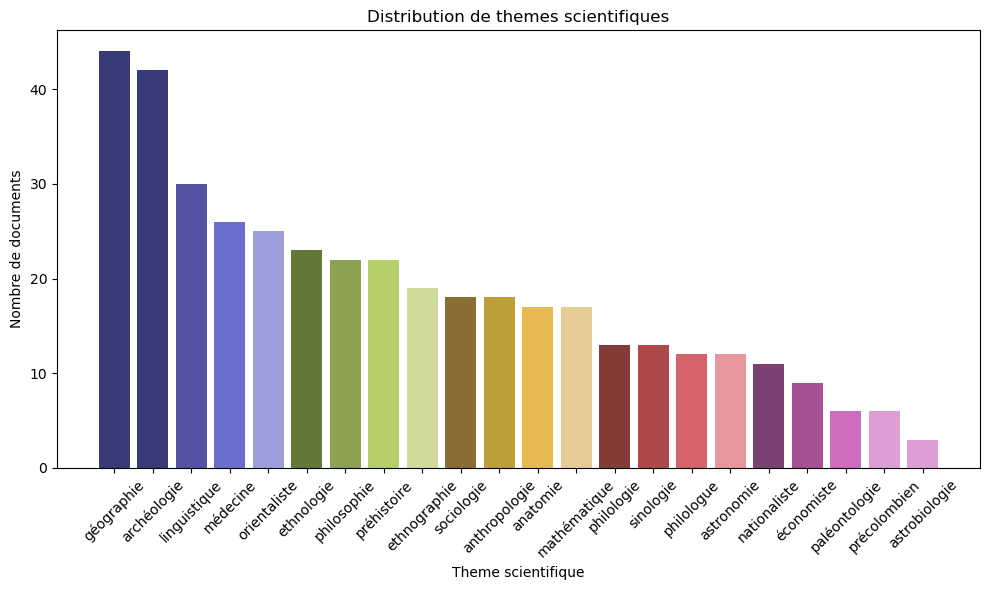

In [37]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Extract words and frequencies from the defaultdict
words = list(keyword_doc.keys())
frequencies = list(keyword_doc.values())

sorted_data = sorted(zip(words, frequencies), key=lambda x: x[1], reverse=True)
sorted_words, sorted_frequencies = zip(*sorted_data)

# Create a colormap that will generate 22 distinct colors
cmap = plt.get_cmap('tab20b', len(words))  # You can choose other colormaps as well

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_words, sorted_frequencies,color=[cmap(i) for i in range(len(words))])


plt.xlabel("Theme scientifique")
plt.ylabel("Nombre de documents")
plt.title("Distribution de themes scientifiques")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()


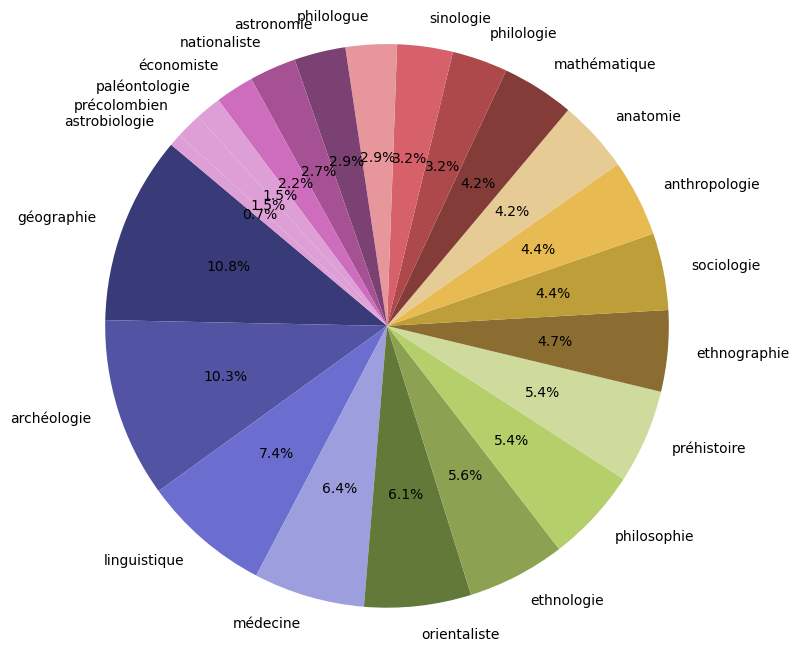

In [46]:
import matplotlib.pyplot as plt

words = list(keyword_doc.keys())
frequencies = list(keyword_doc.values())

# Sample data with category labels and their corresponding values
categories = sorted_words
values = sorted_frequencies

# categories = words
# values = frequencies

colormap = plt.get_cmap('tab20b')

# Create a circle plot (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, colors=[colormap(i) for i in range(len(sorted_words))],autopct='%1.1f%%', startangle=140)
# plt.pie(sorted_frequencies, sorted_words, colors=[colormap(i) for i in range(len(sorted_words))], autopct='%1.1f%%', startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
# plt.title("Distribution des sujets")

# Show the plot
plt.show()


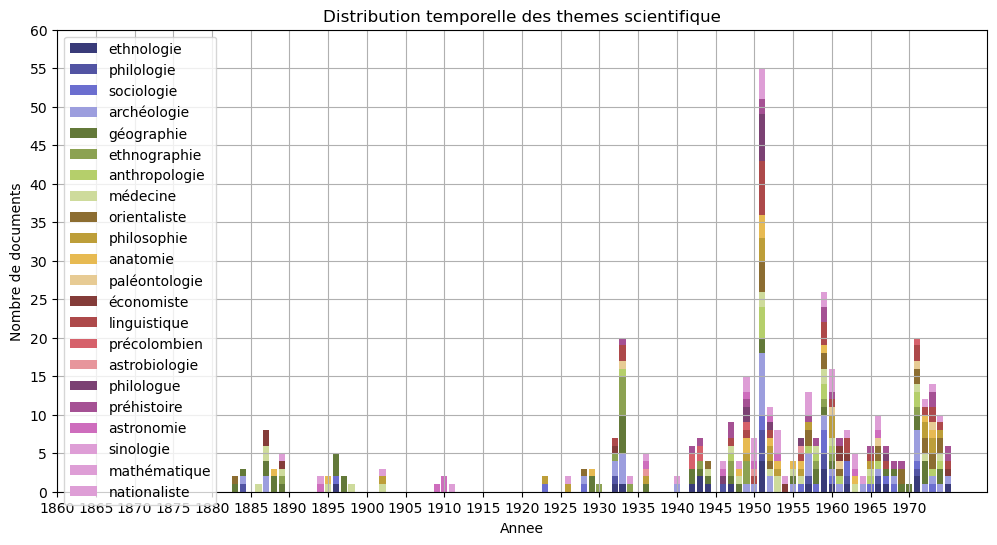

In [49]:
import matplotlib.pyplot as plt
from collections import defaultdict

word_years = keyword_year

# Create a defaultdict to count year occurrences per word
year_counts_by_word = defaultdict(lambda: defaultdict(int))

# Count year occurrences per word
for word, years in word_years.items():
    for year in years:
        year_counts_by_word[word][year] += 1

# Prepare data for plotting
words = list(word_years.keys())
years = sorted(set(year for years in word_years.values() for year in years))
year_data = {year: [] for year in years}

for word, year_counts in year_counts_by_word.items():
    for year in years:
        year_data[year].append(year_counts[year])

# Create a stacked bar plot for each word's year distribution
plt.figure(figsize=(12, 6))

bottom = [0] * len(years)
i=0
for word in words:
    counts = [year_data[year].pop(0) for year in years]
    plt.bar(years, counts, label=word, color=colormap(i), bottom=bottom)
    bottom = [bottom[i] + counts[i] for i in range(len(years))]
    i+=1
    
plt.xlabel("Annee")
plt.ylabel("Nombre de documents")
plt.xticks(range(1860,1975,5))
plt.yticks(range(0,65,5))
plt.title("Distribution temporelle des themes scientifique")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


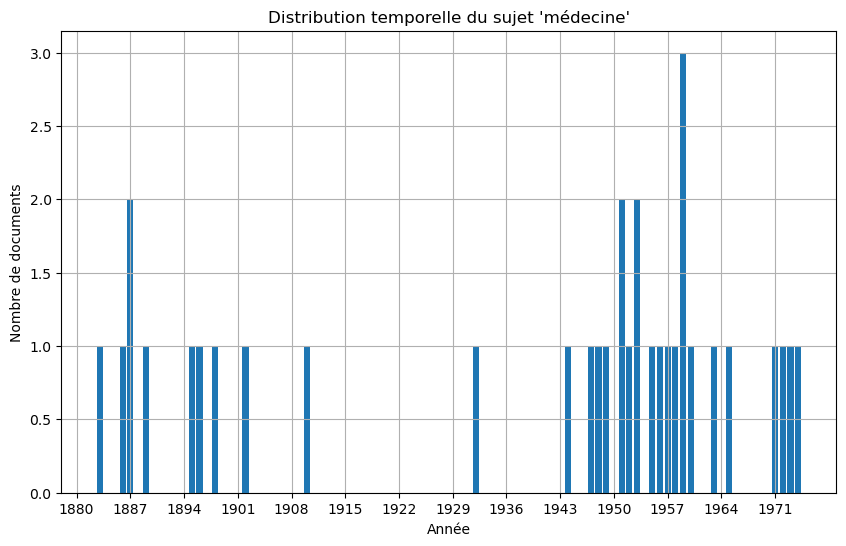

In [64]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Sample data as a dictionary
word_years = keyword_year

# Specify the word you want to plot
specific_word = "médecine"

# Create a defaultdict to count year occurrences for the specific word
year_counts_for_word = defaultdict(int)

# Count year occurrences for the specific word
if specific_word in word_years:
    years = word_years[specific_word]
    for year in years:
        year_counts_for_word[year] += 1

# Prepare data for plotting
years = sorted(set(years))
counts = [year_counts_for_word[year] for year in years]

# Create a bar plot for the specific word's year distribution
plt.figure(figsize=(10, 6))
plt.bar(years, counts)
plt.xticks(range(1880,1975,7))
plt.xlabel("Année")
plt.ylabel("Nombre de documents")
plt.title(f"Distribution temporelle du sujet '{specific_word}'")
plt.grid(True)
plt.show()


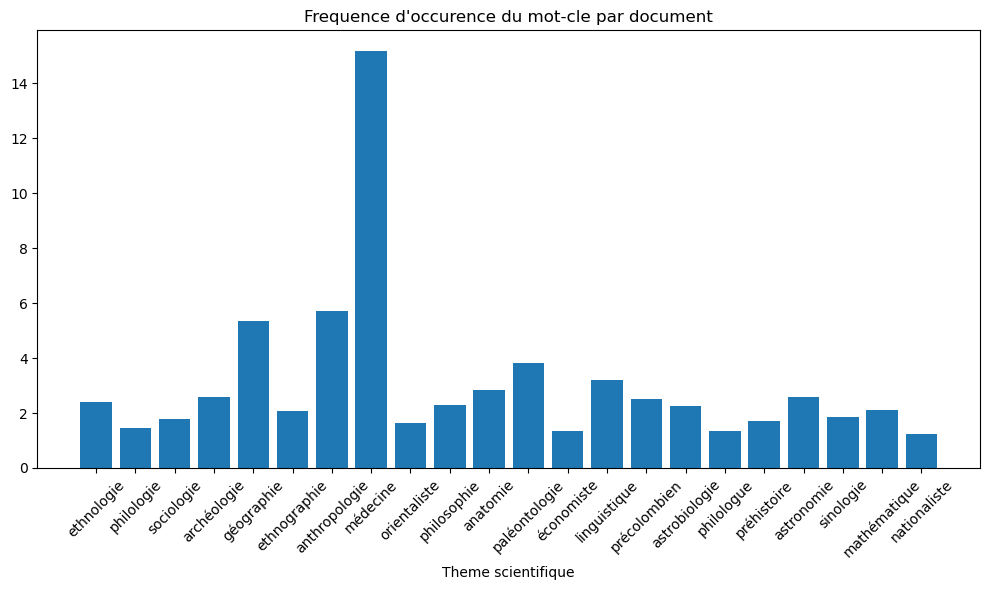

In [17]:
frequencies = list(keyword_freq.values())
nbdoc = list(keyword_doc.values())
import matplotlib.pyplot as plt
words = list(keyword_freq.keys())
result = [x / y for x, y in zip(frequencies, nbdoc)]
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, result)
plt.xlabel("Theme scientifique")
# plt.ylabel("Frequence d'occurence du mot-cle par document")
plt.title("Frequence d'occurence du mot-cle par document")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

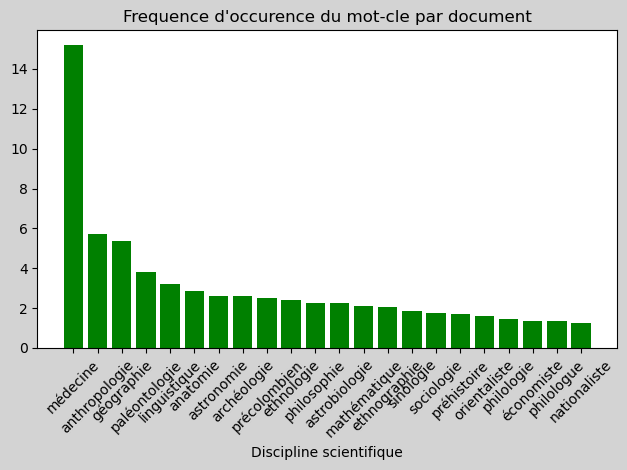

In [25]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
values = [5, 2, 8, 1, 7]

# Sort the values and categories in ascending order
sorted_values, sorted_categories = zip(*sorted(zip(result, words), reverse = True))

# Create a figure and axis
fig, ax = plt.subplots()
# Set the background color of the figure
fig.set_facecolor('lightgray')  # Change 'lightgray' to your desired color

# Create a bar plot with sorted values
ax.bar(sorted_categories, sorted_values, color = 'green')

# Add labels and title
ax.set_xlabel('Discipline scientifique')
# ax.set_ylabel('Values')
ax.set_title("Frequence d'occurence du mot-cle par document")

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit in the plot area
plt.show()


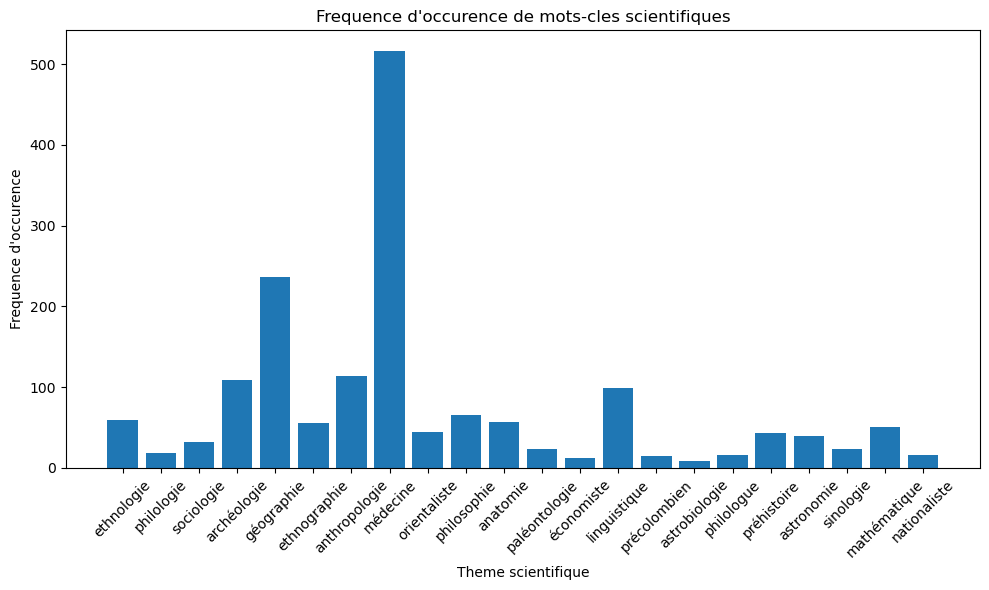

In [53]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Extract words and frequencies from the defaultdict
words = list(keyword_freq.keys())
frequencies = list(keyword_freq.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel("Theme scientifique")
plt.ylabel("Frequence d'occurence")
plt.title("Frequence d'occurence de mots-cles scientifiques")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()


In [35]:
# first analyse on topics frequency appearance of keywords 

from collections import Counter, defaultdict

corpus_search = [preprocessed_corpus[294]]
    
# Tokenize the corpus
search_tokens = [nltk.word_tokenize(sentence.lower()) for sentence in corpus_search]

# Create a frequency dictionary for keywords
keyword_freq = defaultdict(int)
ww = ['géographie']

# Loop through the corpus and count keyword frequencies
for sentence_tokens in search_tokens:
    for word in sentence_tokens:
        if word in ww:
            keyword_freq[word] += 1
sum_freq = 0
# Display the frequency of each keyword
for keyword, frequency in sorted(keyword_freq.items(),key=lambda item: item[1]):
    print(f"'{keyword}': {frequency} fois dans document de {len(corpus_search[0])} mots")
    sum_freq += frequency
print(sum_freq)

0


In [37]:
if not keyword_freq:
    print('empty')

empty


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff88fdd0ea0>
Traceback (most recent call last):
  File "/home/sau/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sau/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sau/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/sau/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split

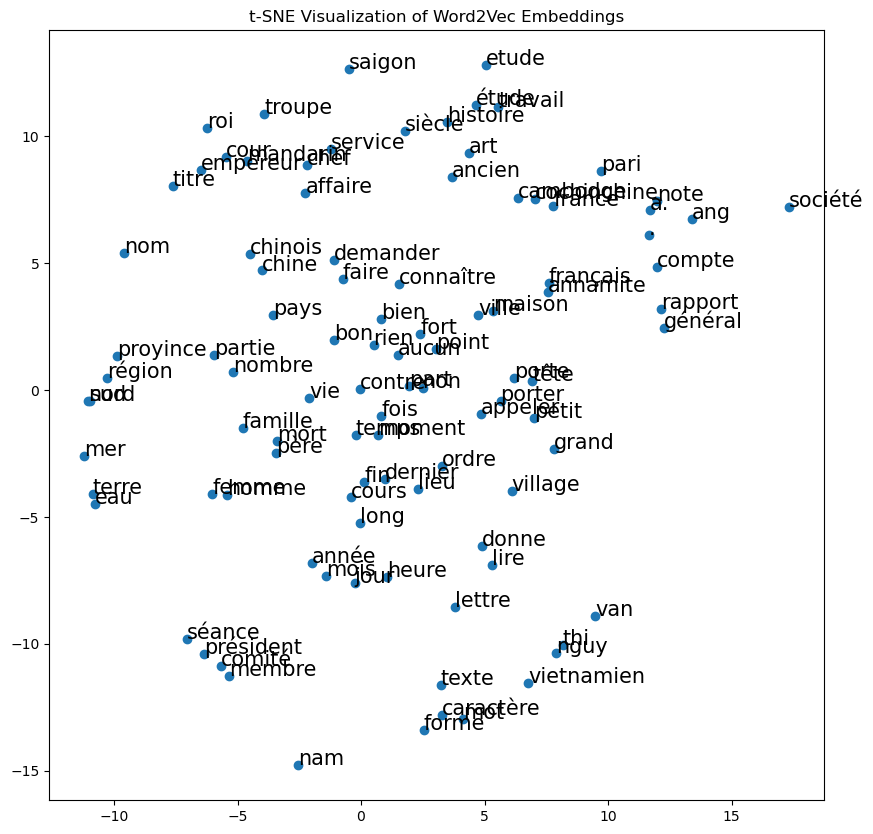

In [65]:
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load your pre-trained Word2Vec model
model =  Word2Vec.load("word2vec_1000_7_12")
# Get the word vectors and corresponding words
words = []
vectors = []
for word, vector in zip(model.wv.index_to_key, model.wv.vectors):
    words.append(word)
    vectors.append(vector)

# Limit the number of words for visualization (optional)
num_words_to_visualize = 100

vectors = np.array(vectors)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, perplexity=10, n_iter=300, random_state=42)
vectors_2d = tsne.fit_transform(vectors[:num_words_to_visualize])

# Create a scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o')

# Annotate the points with word labels
for i, word in enumerate(words[:num_words_to_visualize]):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=15)

plt.title('t-SNE Visualization of Word2Vec Embeddings')
plt.show()
